In [3]:
import pandas as pd
import numpy as np

## Questão 1

1.Quatro recibos de uma livraria foram selecionados para avaliar a natureza das vendas de livros. Há informações sobre o número de livros vendidos e o valor total da venda. Os valores das vendas (US$) foram 42, 52, 48, 58, enquanto o número de livros vendidos em cada recibo foi 4, 5, 4, 3, respectivamente.


**Questões:**

a) Quais os valores de **n** e **p**?

b) Obtenha a matriz de dados **X** correspondente (usando a função `array` do NumPy).

c) Obtenha **X̄** (média), **S** (covariância), **R** (correlação) e **W** (???) no Python usando as funções `mean`, `cov` e `corrcoef`.



In [5]:
data = {'quantidade_vendida': [4, 5, 4, 3], 'valor_venda': [42, 52, 48, 58]}
df = pd.DataFrame(data=data)
df.head()

,quantidade_vendida,valor_venda
0,4,42
1,5,52
2,4,48
3,3,58


In [6]:
# a.
print(f'Número de Linhas (n): {df.shape[0]}')
print(f'Número de Colunas (p): {df.shape[1]}')

Número de Linhas (n): 4
Número de Colunas (p): 2


In [7]:
# b.
X = df.to_numpy()
X

array([[ 4, 42],
       [ 5, 52],
       [ 4, 48],
       [ 3, 58]])

In [8]:
# c.
print("Média:")
df.mean()

Média:


,0
quantidade_vendida,4.0
valor_venda,50.0


In [9]:
print("Covariância: ")
df.cov()

Covariância: 


,quantidade_vendida,valor_venda
quantidade_vendida,0.666667,-2.000000
valor_venda,-2.000000,45.333333


In [10]:
print("Correlação: ")
df.corr()

Correlação: 


,quantidade_vendida,valor_venda
quantidade_vendida,1.000000,-0.363803
valor_venda,-0.363803,1.000000


In [11]:
# matriz de somas de quadrados e produtos
n = X.shape[0]
S = np.cov(X.T)

print("Matriz de Somas de Quadrados e Produtos: ")
W = (n - 1) * S
print(W)

Matriz de Somas de Quadrados e Produtos: 
[[  2.  -6.]
 [ -6. 136.]]


## Questão 2

2. Seja o seguinte conjunto de dados:

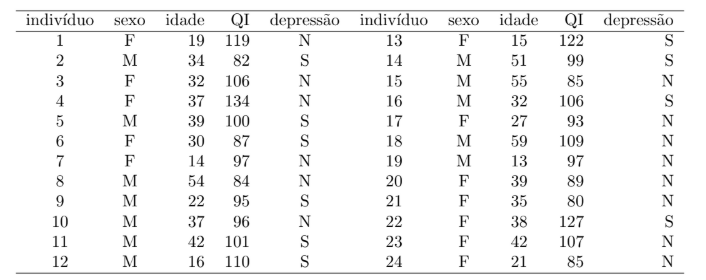

In [12]:
dados = pd.read_csv('https://patriciasiqueira.github.io/arquivos/depressao.csv')
dados.head() # visualizar as primeiras observa ̧c~oes

,Unnamed: 0,sexo,idade,QI,dep
0,1,F,19,119,N
1,2,M,34,82,S
2,3,F,32,106,N
3,4,F,37,134,N
4,5,M,39,100,S


a) Crie um conjunto de dados selecionando apenas as variáveis numéricas:

In [14]:
# df_num = dados.select_dtypes(exclude='object')
# df_num.head()

dados = dados.loc[:, ['idade', 'QI']]

Obs.: Para selecionar apenas as colunas de interesse usando o pacote pandas, basta usar a função loc e passar uma lista com os nomes das variáveis.

b) Obtenha o vetor de médias amostrais, as matrizes de covariâncias e de correlações amostrais usando o pacote pandas (funções `mean`, `cov` e `corr`).

c) Transforme o dataframe dados em um objeto numpy por meio de:

In [15]:
# b.
print('Médias: ')
dados.mean()

Médias: 


,0
idade,33.458333
QI,100.416667


In [16]:
print('Covariâncias: ')
dados.cov()

Covariâncias: 


,idade,QI
idade,178.172101,-28.807971
QI,-28.807971,211.210145


In [17]:
print('Correlações: ')
dados.corr()

Correlações: 


,idade,QI
idade,1.000000,-0.148503
QI,-0.148503,1.000000


In [18]:
# c.
dados_np = dados.to_numpy()
dados_np

array([[ 19, 119],
       [ 34,  82],
       [ 32, 106],
       [ 37, 134],
       [ 39, 100],
       [ 30,  87],
       [ 14,  97],
       [ 54,  84],
       [ 22,  95],
       [ 37,  96],
       [ 42, 101],
       [ 16, 110],
       [ 15, 122],
       [ 51,  99],
       [ 55,  85],
       [ 32, 106],
       [ 27,  93],
       [ 59, 109],
       [ 13,  97],
       [ 39,  89],
       [ 35,  80],
       [ 38, 127],
       [ 42, 107],
       [ 21,  85]])

Obtenha as mesmas quantidades da letra b, porém usando o pacote NumPy (funções `mean`, `cov` e `corrcoef`). Os vetores e matrizes foram os mesmos obtidos na letra b?

In [20]:
print('Médias: ')
np.mean(dados_np, axis=0)

Médias: 


array([ 33.45833333, 100.41666667])

In [23]:
print('Covariâncias: ')
S = np.cov(dados_np.T)
S

Covariâncias: 


array([[178.17210145, -28.80797101],
       [-28.80797101, 211.21014493]])

In [22]:
print('Correlações: ')
np.corrcoef(dados_np.T)

Correlações: 


array([[ 1.        , -0.14850307],
       [-0.14850307,  1.        ]])

**Conclusão:** Os resultados encontrados foram os mesmos.

d) Como você classifica a correlação entre idade e QI na amostra? Ela é positiva ou negativa? Forte ou fraca?

**Resposta:** Correlação negativa fraca

## Questão 3

3. Sobre a matriz 𝑆, obtida a partir dos dados da questão 2, responda:

a) A matriz 𝑆 é simétrica?

b) Essa matriz admite inversa? Explique (usando comandos do Python) como você chegou a essa conclusão.

c) Se sim, qual é a inversa?

d) A matriz 𝑆 é positiva definida? Justifique sua resposta usando os comandos necessários para embasá-la.

In [27]:
# a.
if np.allclose(S, S.T):
  print("Sim, a matriz S é simétrica.")
else:
  print("A matriz S não é simétrica")

Sim, a matriz S é simétrica.


In [28]:
# b.

if np.linalg.det(S) != 0:
  print("A matriz S admite inversa.")
else:
  print("A matriz S não admite inversa.")

A matriz S admite inversa.


In [29]:
# c.
print("Inversa de S: ")

np.linalg.inv(S)

Inversa de S: 


array([[0.00573912, 0.00078279],
       [0.00078279, 0.00484139]])

In [30]:
# d.

l, e = np.linalg.eig(S)
idx = np.argsort(l)[::-1]
l = l[idx]
e = e[:, idx]

In [33]:
count = 0
for value in l:
  if value > 0:
    count+=1

if count == len(l):
  print("A matriz S é positiva definida.")
else:
  print("A matriz S não é positiva definida.")

A matriz S é positiva definida.
